# Part I - Fordgobike-TripData Data Exploration
## by Jorge Muñoz Rama

## Table of contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess and explore data</a></li>
<li><a href="#clean">Clean data</a></li>
<li><a href="#store">Store Data</a></li>   
<li><a href="#analysis">Analysis and Visualization</a></li>
    <ul>
    <li><a href="#univariate">Univariate Exploration</a></li>
    <li><a href="#bivariate">Bivariate Exploration</a></li>
    <li><a href="#multivariate">Multivariate Exploration</a></li>
    </ul>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='introduction'></a>
## Introduction
According with wikipedia: Bay Wheels was originally launched as Bay Area Bike Share in August 2013. At launch, it became the first regional bicycle sharing system deployed on the West Coast of the United States and also the first regional system in the U.S.
The bicycles are available 24 hours a day, 365 days a year. Customers may choose from a number of options ranging from a single ride to an annual membership.  

On June 28, 2017, the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels on June 11, 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

<a id='gather'></a>
## Gather the data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\sonch\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


> We are going to use the Ford gobike trip data suplied by Udacity to make the study..


In [2]:
# Load and open the dat from my computer
df = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id='assess'></a>
## Assess and explore data

In [3]:
# let's se the data frame
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Get the dimension of the data
df.shape

(183412, 16)

The data set hav 183412 rows and 16 columns

In [5]:
# Let's explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

star_station_id and end_station_id should be integer. There are nan's.

In [6]:
# Let's see the type of data

print(type(df.start_time[0]))
print(type(df.end_time[0]))
df.start_time[0]

<class 'str'>
<class 'str'>


'2019-02-28 17:32:10.1450'

We are going to change the data type in star_time and end_time to data time and it would be intersting to create new columns like the time in hours and if the day is weekend or a working day.

In [7]:
# Check how many nan's have the columns
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are few nan's in start_station_id, start_station_name, end_station_id and, end_station_name.  
member_birth_year   and menber_gender  have more.

In [8]:
# Let's check the number of nan's in porcentage
(df.isna().sum()/df.count())*100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107524
start_station_name         0.107524
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107524
end_station_name           0.107524
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.718893
member_gender              4.718893
bike_share_for_all_trip    0.000000
dtype: float64

start_station_id, start_station_name, end_station_id and end_station_name has 0.10 % of nan's, meanwhile member_birth_year          4.718893
member_gender have 4.71 % of nan's

In [9]:
# Let's check if there are duplicated rows or duplicated tweet_id
print(df.duplicated().sum())

0


There are not duplicated rows in the data

In [10]:
# Ckeck the number of unique station there are.
print(df.start_station_id.nunique())
print(df.end_station_id.nunique())

print(df.start_station_name.nunique())
print(df.end_station_name.nunique())



print(df.start_station_longitude.nunique())
print(df.start_station_latitude.nunique())

print(df.end_station_longitude.nunique())
print(df.end_station_latitude.nunique())

329
329
329
329
335
334
335
335


We found that there are 329 different station. We see that there is one more unique start_station_longitude than start_station_latitude, but it is posible that have two station with the same latitud.

There are the same amout of start station and end station, which is make sense as well  station names.

In [11]:
# Let's check if all the start_station_name are the same than end_station_name
df.start_station_name.isin(df["end_station_name"]).sum()

183412

We see that the sum is equal to the number of row, so they are the same.

In [12]:
#Let's see how many rides have the ten first start station just to compare with end station
# Tray to understand the data
df.start_station_name.value_counts().head(10)

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

In [13]:
# Let's see how many rides have the the ten first end station
df.end_station_name.value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Powell St BART Station (Market St at 5th St)                 2353
Steuart St at Market St                                      2338
Name: end_station_name, dtype: int64

The ten principels start station with more rides are almost the same than the end station with the excepcion of Howard St at Beale St.

In [14]:
# Let's explore gender
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [15]:
# Let's explore the gender by procentage
(df.member_gender.value_counts()/df.member_gender.value_counts().sum())*100

Male      74.595054
Female    23.319840
Other      2.085106
Name: member_gender, dtype: float64

We see 74.6% is Male, 23.3% is Femele and Other 2.1 %

In [16]:
# Get the amout of people by year of birht
df.member_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

We see values like 1878 that don't make sense. The mean is 1984, and because the the dispersion in the data the median 1987 is a most robust value than mean.

In [17]:
# Let's get a tiny quantile
q = df["member_birth_year"].quantile(0.005)
df[df["member_birth_year"] < q].member_birth_year.sort_values(ascending =False)

89090     1950.0
43818     1950.0
34291     1950.0
34493     1950.0
74463     1950.0
           ...  
66700     1900.0
72711     1900.0
72819     1900.0
173711    1900.0
27370     1878.0
Name: member_birth_year, Length: 852, dtype: float64

It seems that we can drop the values from 1900 to 1950. There are just 852 rows. The year of birth is a float. We are going to fix that converting to integer.

In [18]:
# Let's see how many bikes_share there are.
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

We get 17359 bike shares

In [19]:
# Let´s see how many different user_type we have in the data
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

We have just two type of user type.

In [20]:
# Get the total number of user by type
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [21]:
# Get the total number of user by type in porcentage
df.user_type.value_counts()/df.user_type.value_counts().sum()

Subscriber    0.891676
Customer      0.108324
Name: user_type, dtype: float64

89 % of the user are subscriber, is a big diference.

## Issues to solve in the data:

* start_time and end_time are not in the timestamp format.
* member_birth_year, start_station_id and end_station_id are going to change to integer
* drop member_birth_year from values greater than 1940. ( there is a lot of outlier and some value that doesn't make any sense like 1878)
* start and end_time has the format Timestamp('2019-02-28 17:32:10.145000'). We are going to create and enrich the data with new columns: month, day and hour.
* duration_sec is the time in seconds, we are going to transform duration_sec in minutes because is more human readable.
* Drop the columns duration_sec, 'start_time, 'end_time.

<a id='clean'></a>
## Clean The data

In [22]:
# Make a copy of the original data

data = df.copy()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Lets change to data time the  start_time and end_time vaiables.

#### Code

In [24]:
data['start_time'] =  pd.to_datetime(data['start_time'])
data['end_time'] =  pd.to_datetime(data['end_time'])

#### Test

In [25]:
print(data.dtypes)
data['start_time'][0]

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


Timestamp('2019-02-28 17:32:10.145000')

We can see that the two variables are now datatime64.

### Change the data type of member_birth_year, start_station_id and  end_station_id to integer.

#### Code

In [26]:
# We are going to use Int64 to skpi the nan's
data['start_station_id'] = data.start_station_id.astype('Int64')
data['end_station_id'] = data.end_station_id.astype('Int64')
data['member_birth_year'] = data.member_birth_year.astype('Int64')

#### Test

In [27]:
data.member_birth_year.head(3)

0    1984
1    <NA>
2    1972
Name: member_birth_year, dtype: Int64

In [28]:
print(data.start_station_id.head(3))
print(data.end_station_id.head(3))

0    21
1    23
2    86
Name: start_station_id, dtype: Int64
0    13
1    81
2     3
Name: end_station_id, dtype: Int64


It worked. Now we have those columns as integers, but remain the nan's.

#### We are going to drop from the column member_birth_year value under 1940

#### Code

In [29]:


# We drop values under  or equal to 1940.
data = data[data['member_birth_year'] >= 1940]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174944 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174944 non-null  int64         
 1   start_time               174944 non-null  datetime64[ns]
 2   end_time                 174944 non-null  datetime64[ns]
 3   start_station_id         174749 non-null  Int64         
 4   start_station_name       174749 non-null  object        
 5   start_station_latitude   174944 non-null  float64       
 6   start_station_longitude  174944 non-null  float64       
 7   end_station_id           174749 non-null  Int64         
 8   end_station_name         174749 non-null  object        
 9   end_station_latitude     174944 non-null  float64       
 10  end_station_longitude    174944 non-null  float64       
 11  bike_id                  174944 non-null  int64         
 12  user_type       

### We are going to create new columns from start_time and end_time when we split the columns in month, day and hour

#### Code

In [31]:
# Let's create new colum relate with monts, days and hours using strat_time
data['start_hour'] = data.start_time.dt.hour
data['start_day'] = data.start_time.dt.day_name()
data['start_month'] = data.start_time.dt.month_name()

# Let's create new colum relate with monts, days and hours using end_time
data['end_hour'] = data.end_time.dt.hour
data['end_day'] = data.end_time.dt.day_name()
data['end_month'] = data.end_time.dt.month_name()

#### Test

In [32]:
data[['start_month', 'start_day', 'start_hour','end_month', 'end_day', 'end_hour']].head()

,start_month,start_day,start_hour,end_month,end_day,end_hour
0,February,Thursday,17,March,Friday,8
2,February,Thursday,12,March,Friday,5
3,February,Thursday,17,March,Friday,4
4,February,Thursday,23,March,Friday,0
5,February,Thursday,23,March,Friday,0


We have created six new columns that we are going to use in our analysis.

In [33]:
# Let's check how many moths there are.
data.start_month.unique()

array(['February'], dtype=object)

In [34]:
data.end_month.unique()

array(['March', 'February'], dtype=object)

The start_month has only one month (February) and end_month has two (March and February)

### We are going to transform duration_sec in minutes because is more human readable.

#### Code

In [35]:
# Let's divide duration_sec by 60.
data['duration'] = data.duration_sec/60

#### Test

In [36]:
(data.duration*60 - data.duration_sec).head()

0    0.000000e+00
2    7.275958e-12
3    0.000000e+00
4    0.000000e+00
5    0.000000e+00
dtype: float64

We see that diference is cero or close to that. That is enough precision for our analysis.

We are going to drop all the rows with nan's because the porcentage in the data is low and for this exemple is enough precision, less than 5% in member_birth_year and member_gender; and 0.107 % in start_station_id, start_station_name, end_station_id and end_station_name

In [37]:
#Let's dropp all the rows with nan
data.dropna(inplace = True)

In [38]:
# Let's drop the columns duration_sec, 'start_time, 'end_time, becuase we have transformed
# in hour, day and month
data.drop(['duration_sec', 'start_time', 'end_time'], axis=1, inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_id         174749 non-null  Int64  
 1   start_station_name       174749 non-null  object 
 2   start_station_latitude   174749 non-null  float64
 3   start_station_longitude  174749 non-null  float64
 4   end_station_id           174749 non-null  Int64  
 5   end_station_name         174749 non-null  object 
 6   end_station_latitude     174749 non-null  float64
 7   end_station_longitude    174749 non-null  float64
 8   bike_id                  174749 non-null  int64  
 9   user_type                174749 non-null  object 
 10  member_birth_year        174749 non-null  Int64  
 11  member_gender            174749 non-null  object 
 12  bike_share_for_all_trip  174749 non-null  object 
 13  start_hour               174749 non-null  int64  
 14  star

Now we don't have nan's and the data is clean.

In [40]:
data.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour', 'start_day', 'start_month', 'end_hour', 'end_day',
       'end_month', 'duration'],
      dtype='object')

<a id='store'></a>
### Store the data

In [41]:
# Store the data
data.to_csv('fordgobike_master_clean_data.csv', index=False)

### What is the structure of your dataset?

> The data has a dimension of 183,412 rows by 16 columns and it's to understand with approximately 183,412 bike rides in the San Francisco Bay area of California. We see that there is a small percentage nan in the variables:
start_station_id , start_station_name , end_station_id ,end_station_name and something larger in the member_birth_year and member_gender variables. In general the data looks well structured.
The data has varaibles relate with date (day,month, year, hour, ect), gender, type of user, date of birth, duration of the trip, coordinates of the stations and some more. Ingeneral the name of the variable are:

* Duration of the rides:  
    + start_time               
    + end_time                 
    + duration_sec  
 
* Stations:
    + start_station_id         
    + start_station_name     
    + end_station_id           
    + end_station_name
 
* Station coordinates 
    + start_station_latitude   
    + start_station_longitude  
    + end_station_latitude     
    + end_station_longitude 

* bike_id
* user characteristics
    + user_type                 
    + member_birth_year        
    + member_gender            

* bike_share_for_all_trip 

After the cleaning process I have created some new variable like start_hour, start_day, start_month, end_hour, end_day,end_month, duration.

### What is/are the main feature(s) of interest in your dataset?

> The data presents variables associated with the bicycle stations and related to the starting or ending points of the trips and  consuming time comuting among the staion.
It can be interesting to try to find relationships such as the most busy station, the days and hours where the system is used more intensively and its duration and its relationships with variables such as type of user, gender,  year of birth, etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The variables that will support my analysis will be: start_station_name, user_type, member_gender, start_time, start_day, member_birth_year and duration. I would say that trying to find relationships between the time consumed in different formats: hours or days versus variables such as station name, type of user, gender or year of birth is very interesting because we can find trends in the data as well as the way of the distribution of the variables and how each of these variables can influence in relation to the time of the trips.

<a id='analysis'></a>
## Analysis and Visualization

<a id='univariate'></a>
## Univariate Exploration

> In this section, I'm going to investigate distributions of individual variables and prepare  to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Before to start our analysis we are going to see a map where the stations are located.

In [42]:
latitud =data.start_station_latitude.unique()
longitud = data.start_station_longitude.unique()
station = data.start_station_name.unique()

In [43]:
import folium 
map = folium.Map(location=[37.56,-122.10], zoom_start=9.5)
folium.TileLayer('cartodbpositron').add_to(map)

for point in range(0, longitud.shape[0]):
    
    folium.Circle([latitud[point], longitud[point]], popup =station[point],
                     radius=50,  fill_opacity=0.7, fill =True,).add_to(map)

map

**We see the stations are located  in San Francisco area at both side of the bridge and in San Jose. You can clik in the blue point to see the name of the station.**

### Let's get the top 10 busiest stations by total rides.

In [44]:
station_top10 =data.groupby(['start_station_name']).count().sort_values(by = 'bike_id', ascending =False ).reset_index().head(10)
station_top10

,start_station_name,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,end_hour,end_day,end_month,duration
0,Market St at 10th St,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648
1,San Francisco Caltrain Station 2 (Townsend St...,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393,3393
2,Berry St at 4th St,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950,2950
3,Montgomery St BART Station (Market St at 2nd St),2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709
4,Powell St BART Station (Market St at 4th St),2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620
5,San Francisco Caltrain (Townsend St at 4th St),2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569
6,San Francisco Ferry Building (Harry Bridges Pl...,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539
7,Howard St at Beale St,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215
8,Steuart St at Market St,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181
9,Powell St BART Station (Market St at 5th St),2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143


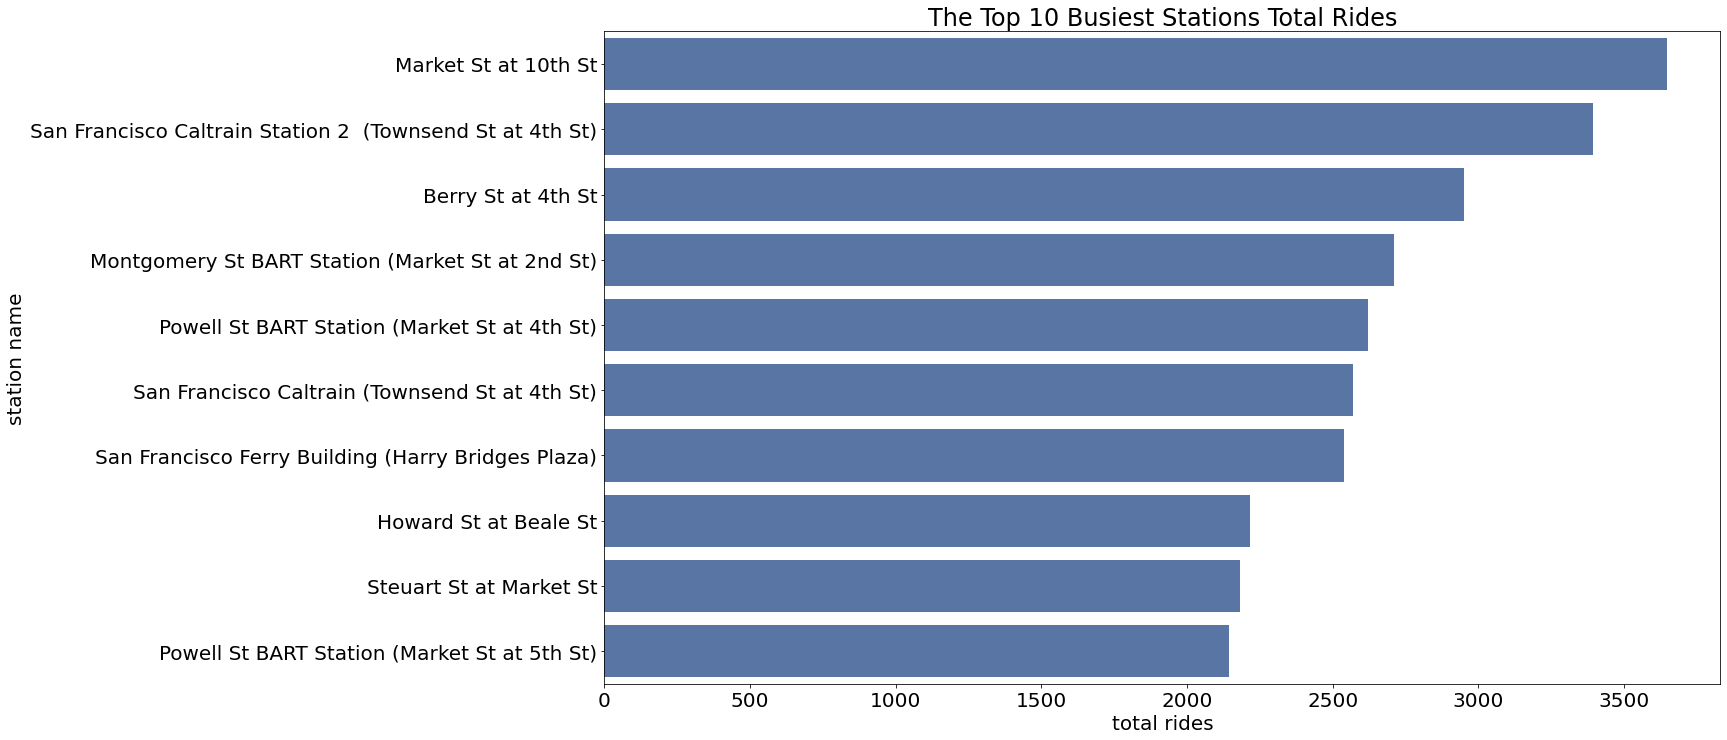

In [45]:
plt.figure(figsize = [20, 12]) 
sb.barplot(data = station_top10, x = 'bike_id', y = 'start_station_name', palette=['#4c72b0'])
plt.ylabel('station name', fontsize=20)
plt.xlabel('total rides', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('The Top 10 Busiest Stations Total Rides', fontsize=24);

**Market St at 10th ST has more rides in total, follow by San Francisco Caltrain Station 2 and Berry St at 4th St.**

### Make a plot Total Bike Rides by day and by hours

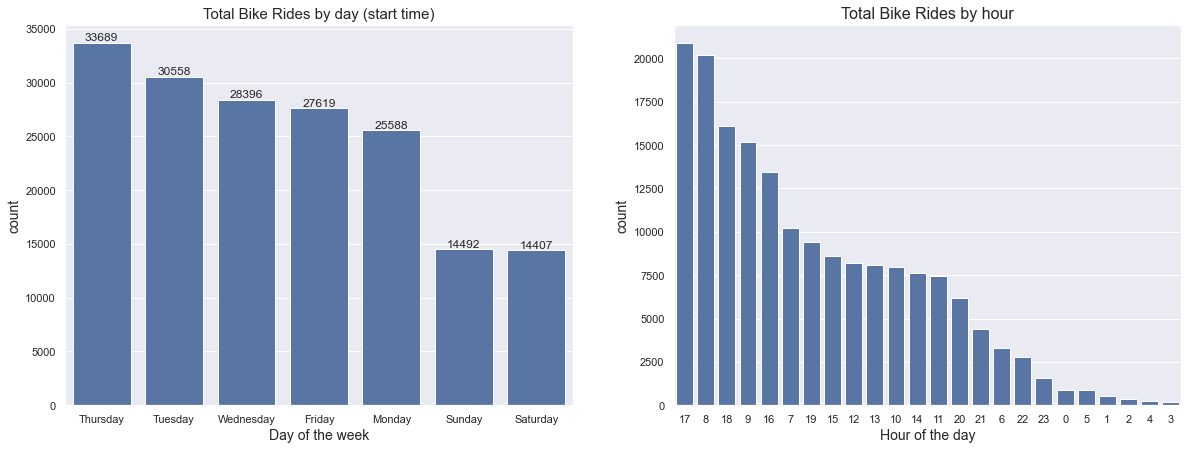

In [46]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 7]) 
sb.set_theme(style="darkgrid")

# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
# Count plot in bar order
g=sb.countplot(data = data, x = 'start_day', palette=['#4c72b0'],
            order = data['start_day'].value_counts().index)
g.bar_label(g.containers[0])
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('Total Bike Rides by day (start time)', fontsize=15);

#  Count plot in bar order
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 
sb.countplot(data = data, x = 'start_hour', palette=['#4c72b0'], 
             order = data['start_hour'].value_counts().index)
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('Total Bike Rides by hour', fontsize=16);

**Thursday has more total trips, follow by Tuesday and Wednesda. There is a decrese in in the number of trips weekend.  
Between 16 and 18 there is the highest total number of trips in the afternoon, with 17 hours being the one with the most. In the mornings, 9:00 a.m. has the highest number of total trips.**

### Let's make a plot of the Number of Rides by type of user and by coustumer type.

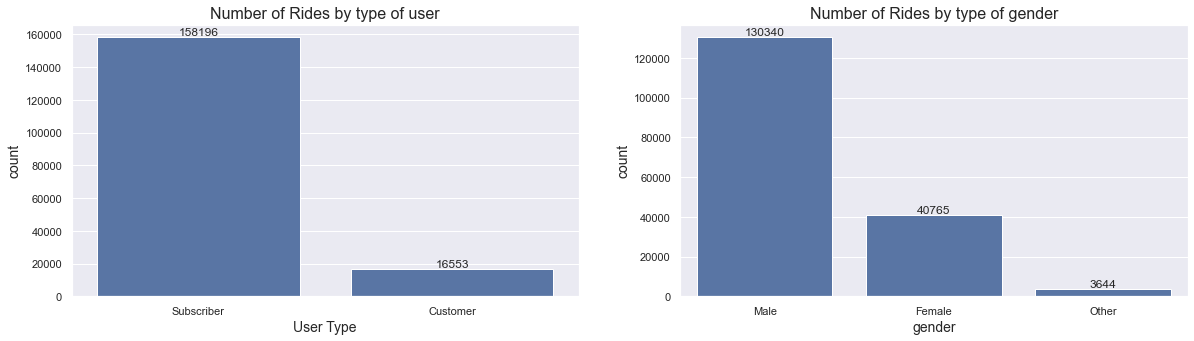

In [47]:
plt.figure(figsize = [20, 5]) 
sb.set_theme(style="darkgrid")

# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
# Count plot in bar order
g =sb.countplot(data = data, x = 'user_type', palette=['#4c72b0'],
            order = data['user_type'].value_counts().index)
plt.ylabel('count', fontsize=14)
plt.xlabel('User Type', fontsize=14)
plt.title('Number of Rides by type of user', fontsize=16)
g.bar_label(g.containers[0])

#  Count plot in bar order
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 
g =sb.countplot(data = data, x = 'member_gender', palette=['#4c72b0'], 
             order = data['member_gender'].value_counts().index)
plt.xlabel('gender', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('Number of Rides by type of gender', fontsize=16)
g.bar_label(g.containers[0]);

**Suscriber has almost ten times more total rides than customer. This, together with the hours in which the service is most used, can give us an idea of which subscribers use it more during working hours.
The distribution among gender we see than the ride of Male is the triple of Femele being other gender a tiny fraction of the total of trips.**

### Lets make a pie chart to see in porcentage the number of rides by gender and by user type.

In [48]:
def piechart_proportion(data , variable_list, title_list, rows, columns):
    """
    This function plot a pie charts in rows and columns The len of the
    variable list it has to be the same as the len of variable_list and 
    title list.
    
    arguments:
    data: data set to consider
    variable list: a list of variable names(strings)
    title_list: a list of titles
    rows: number of row to plot ( integer)
    columns: number of columns to plot (intege
    
    return: A pie chart plot 
    """
    
    plt.figure(figsize = [22, 8]) 
    sb.set_theme(style="darkgrid")
    subplot_number = len(variable_list)
    
    for plot in range(0, subplot_number ):
        plt.subplot(rows, columns, plot+1 )
        
        #plotting data on chart
        plt.pie(data[variable_list[plot]].value_counts(), labels=data[variable_list[plot]].value_counts().index,
                 autopct='%.0f%%')
        plt.title(title_list[plot], fontsize=16)
    # displaying chart
    plt.show()

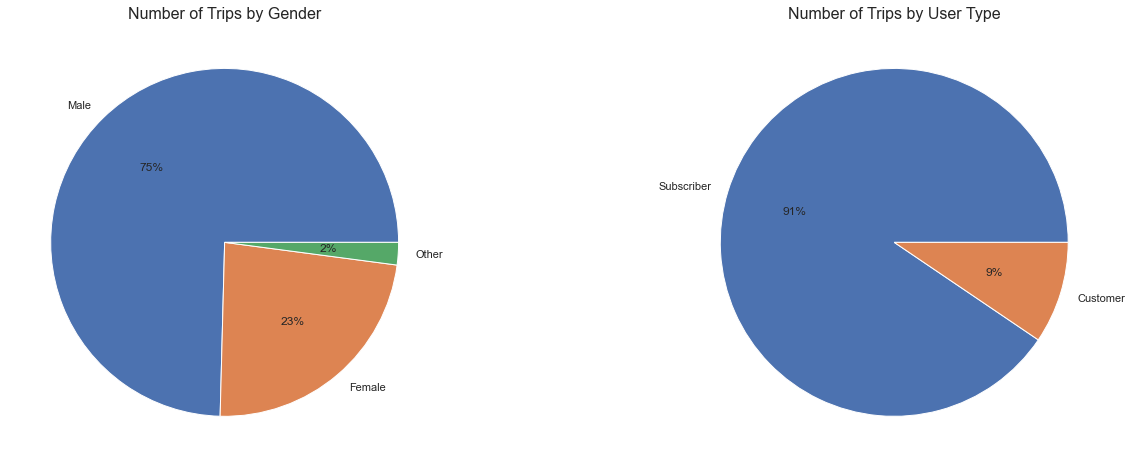

In [49]:
piechart_proportion(data ,['member_gender', 'user_type'], 
                    ['Number of Trips by Gender', 'Number of Trips by User Type'], rows =1, columns = 2 )

**75% of the total rides was made by Male, 23 % by Femele and 2% by other. 91% of the total rides was made by Subscribers and 9 % by Customers.**

### Let's get the trend of the start hour by number of rides.

In [50]:
hour_trend = data.groupby('start_hour').count().reset_index()[['start_hour', 'bike_id']]
hour_trend

,start_hour,bike_id
0,0,892
1,1,525
2,2,354
3,3,164
4,4,227
5,5,866
6,6,3289
7,7,10226
8,8,20218
9,9,15194


### Make a plot that showns the trend in the bike rides by hours.

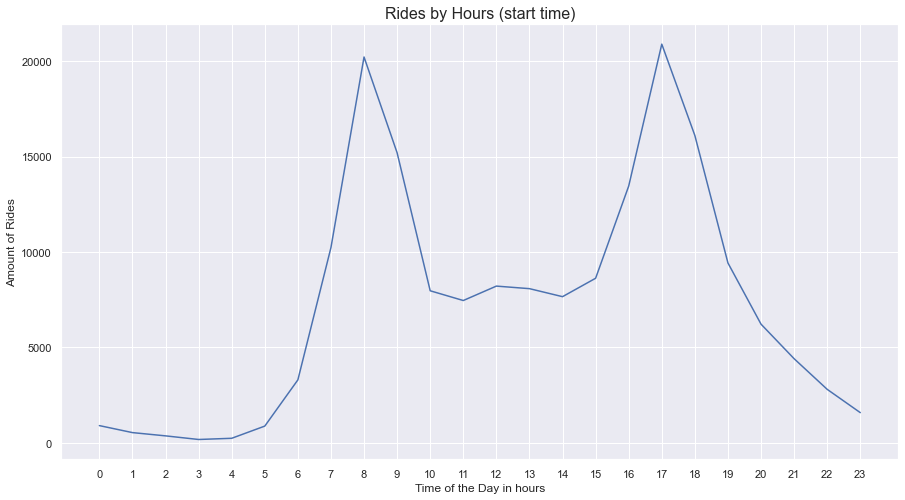

In [51]:
import matplotlib.dates as mdates
plt.figure(figsize = [15, 8]) 
chart = sb.lineplot(data=hour_trend, x="start_hour", y="bike_id")
plt.xlabel('Time of the Day in hours')
plt.ylabel('Amount of Rides')
plt.title('Rides by Hours (start time)', fontsize = 16)
plt.xticks(np.arange(24));

**We can see two clear peak in the trend of the amount of rides along of the hours of the day. One of them is among 7 and 9 and the other is between 16 and 18. And clearly coincides with work schedule**

### Let's make a histogram amount of rides by hour.

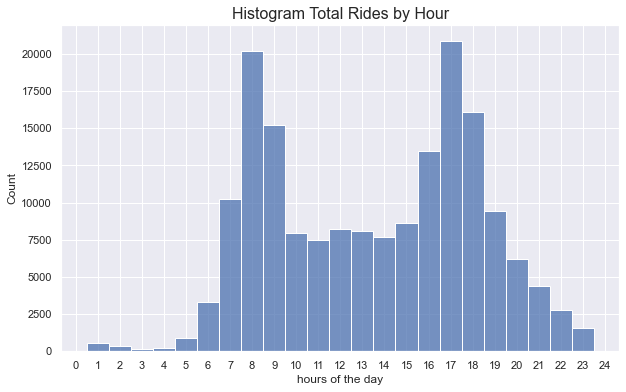

In [52]:
plt.figure(figsize = [10, 6]) 
bins = np.arange(0.5, data['start_hour'].max()+1, 1)
g =sb.histplot(data=data, x='start_hour', bins=bins, palette=['#4c72b0'])
x_ticks = [0,1, 2,3, 4,5,6,7 ,8,9,10,11,12,13,14,15,16,17,18, 19,20,21,22,23,24]
g.set(xticks = x_ticks, xticklabels = x_ticks)
plt.xlabel('hours of the day')
plt.title('Histogram Total Rides by Hour', fontsize=16);

**As we saw in the previous graph, the histogram confirms that there are two clear peaks in the histogram (bimodal). We found that the range of hours with the most rides are from 7:00 to 9:00 in the morning and from 16:00 to 18:00 in the afternoon. It can clearly be linked with the time of entry and exit of work.**


### Let's make a histogram relate birth of year with the total number of rides.

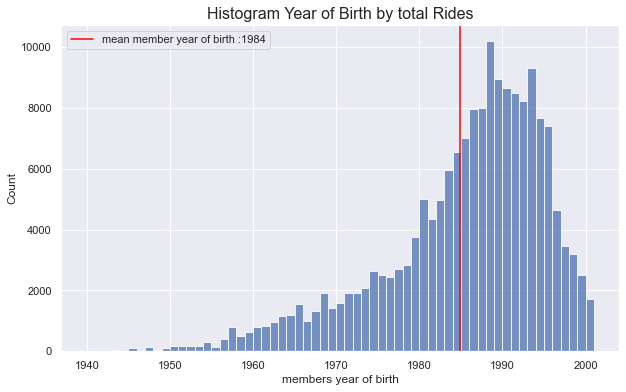

In [53]:
plt.figure(figsize = [10, 6]) 
bins = np.arange(1940, data['member_birth_year'].max()+1, 1)
sb.histplot(data=data, x='member_birth_year', bins=bins, palette=['#4c72b0'])
plt.axvline(x=data.member_birth_year.mean(), color='red', 
            label= 'mean member year of birth'  +  ' :' + str(int(data.member_birth_year.mean())))
plt.legend(loc = 'upper left')
plt.xlabel('members year of birth')
plt.title('Histogram Year of Birth by total Rides', fontsize=16);


**The data is left skewed with the mean of the year of birth equal 1984. When we cleaned the data we drop year of birth before 1940 because we considered them as outliers**

In [54]:
# Get some statistical basics of the duration variable
data.duration.describe()

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration, dtype: float64

We see that the mean is 11.73 but we have a max value 1409.13. There are a lot of outlier, It seems that the median (8.5) is a more robust value in the duration variable.

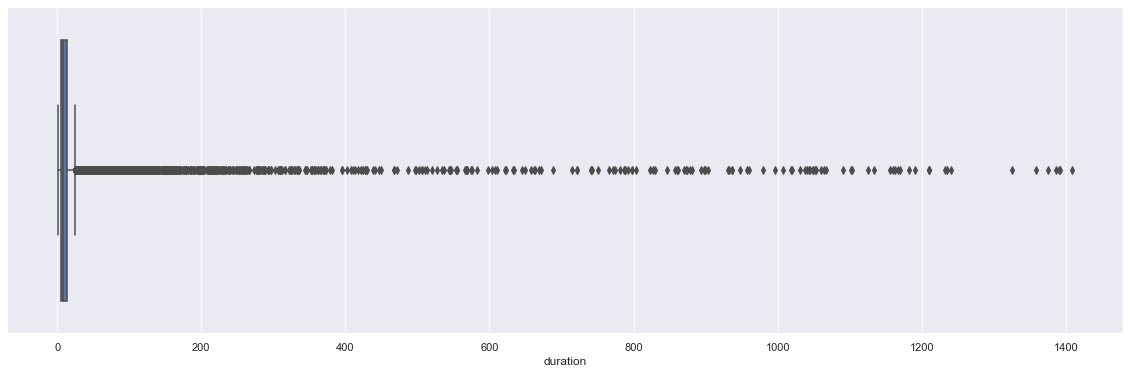

In [55]:
# Let's see a boxplot of he duration in minutes
plt.figure(figsize=(20,6))

sb.boxplot(data = data, x = 'duration', palette=['#4c72b0']);

**We can see that there are a lot of outlier in duration in minutes**

### Let's see the duration distribution in minutes.
Because the duration variable has a lot of outlier, we are goin to make a histogram with a range of value form cero to 100.

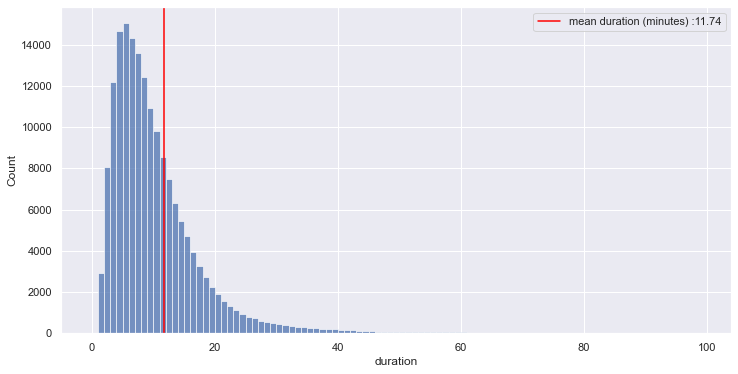

In [56]:
plt.figure(figsize = [12, 6]) 
bins = np.arange(0,100,1)
g =sb.histplot(data=data, x='duration', bins=bins, palette=['#4c72b0'])
plt.axvline(x=data.duration.mean(), color='red', label= 'mean duration (minutes)'  +  ' :' + 
            str(round(data.duration.mean(),2)))
plt.legend(loc = 'upper right');

**The distribution in duration in minutes is right skewed where 11.74 minutes is the avarege by ride. we have represented values from cero to one hundred in the plot**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were a lot of outlier in the duration variable with some value time close to 24 hours of duration. For this specific case I fixed 100 minutes as a maximun value to represent the histogram of the duration and I found that the mean in the duration of the trips was 11.74 minutes. we had cleaned member_birth_year greater than 1940 and I made a histogram taken that in acount.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> If we consider tThe member_birth_year with all the data the distribution is so left skewed and not readable, so we take the quantile 0.005 that filteedr the data for values greater than 1940, that allowed us to visualize the histogram.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, we are going to investigate relationships between pairs of variables.

In [57]:
data.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour', 'start_day', 'start_month', 'end_hour', 'end_day',
       'end_month', 'duration'],
      dtype='object')

### Let's see the relation between year of birth and duration in minutes

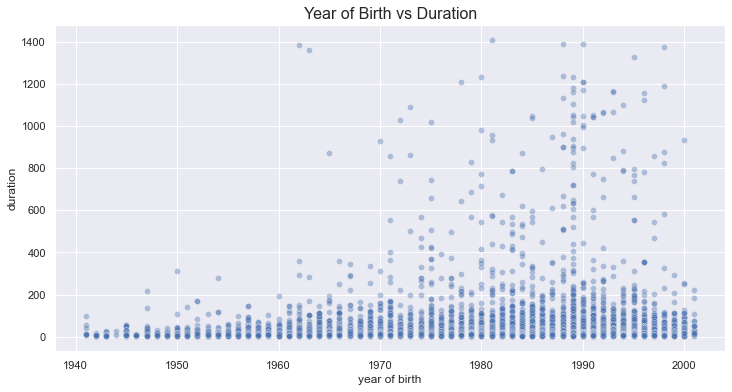

In [58]:
plt.figure(figsize = [12, 6]) 
sb.scatterplot(data = data, x ='member_birth_year', y = 'duration', alpha = 0.4)
plt.xlabel('year of birth')
plt.title('Year of Birth vs Duration', fontsize=16);

**It's dificult to see if there is correlation between this two variable, it seems that there is not corralation.**

esto es una prueba

esto es una prueba

esto es una prueba

### Let's calculate the correlation.

In [59]:
data[['duration','member_birth_year' ]] .corr()

,duration,member_birth_year
duration,1.000000,-0.007217
member_birth_year,-0.007217,1.000000


**The correlation between duration and year of birth is weak.**

### Let's check the mean of the  duration of the trips by day of the week.

In [60]:
day_mean_duration =data.groupby(['start_day']).agg({'duration': 'mean'}).sort_values(by = 'duration',
                                                                    ascending = False).reset_index()
day_mean_duration =day_mean_duration.round({'duration': 2})
day_mean_duration

,start_day,duration
0,Sunday,14.32
1,Saturday,14.17
2,Monday,11.63
3,Friday,11.36
4,Thursday,11.31
5,Wednesday,11.09
6,Tuesday,10.88


### Make a plot of day of the week vs mean duration

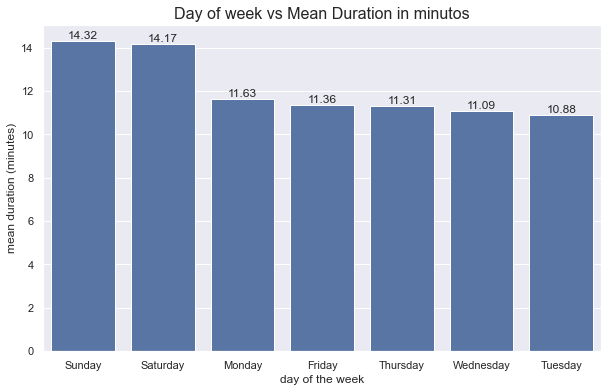

In [61]:
plt.figure(figsize = [10, 6]) 
g =sb.barplot(data = day_mean_duration, x = 'start_day', y = 'duration',
          palette=['#4c72b0'])
g.bar_label(g.containers[0])
plt.ylabel('mean duration (minutes)')
plt.xlabel('day of the week')
plt.title('Day of week vs Mean Duration in minutos', fontsize=16);

**Sunday and Saturday have the highest average duration in minutes. We have seen that there were fewer trips on weekends than on weekdays. It seems that people spend more time on the weekends probably just for fun and sightseeing.**

### Let's see the flutuation of the mean duration trips along the hours of the day

In [62]:
hour_mean_duration =data.groupby(['start_hour']).agg({'duration': 'mean'}).sort_values(by = 'start_hour',
                                                                    ascending = False).reset_index()
hour_mean_duration = hour_mean_duration.round({'duration': 2})

### Let's make a plot of the flutuation of the mean duration trips along the hours of the day

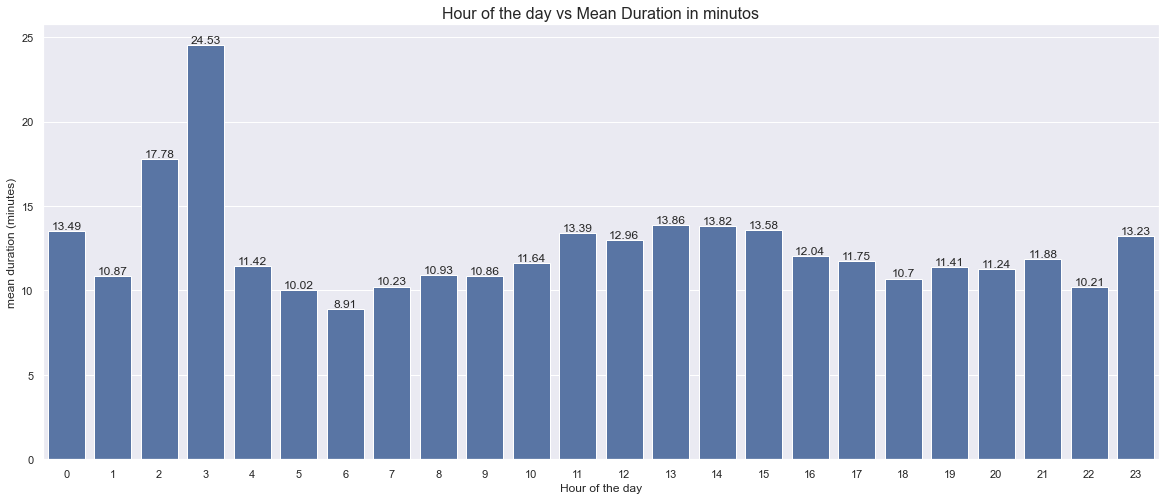

In [63]:
plt.figure(figsize = [20, 8]) 
g =sb.barplot(data = hour_mean_duration, x = 'start_hour', y = 'duration',
          palette=['#4c72b0'])
g.bar_label(g.containers[0])
plt.ylabel('mean duration (minutes)')
plt.xlabel('Hour of the day')
plt.title('Hour of the day vs Mean Duration in minutos', fontsize=16);

In general the average duration of trips is shorter during working hours.

**In working hours, the average duration remains close to the general average duration for all trips (11.74 minutes). Between 2 and 3 in the morning the average increases from 17.78 to 24.93.**

### Let's make a boxplot about the duration of the rides by user type and gender
We are going to show duration less or equal to 100 minutes.

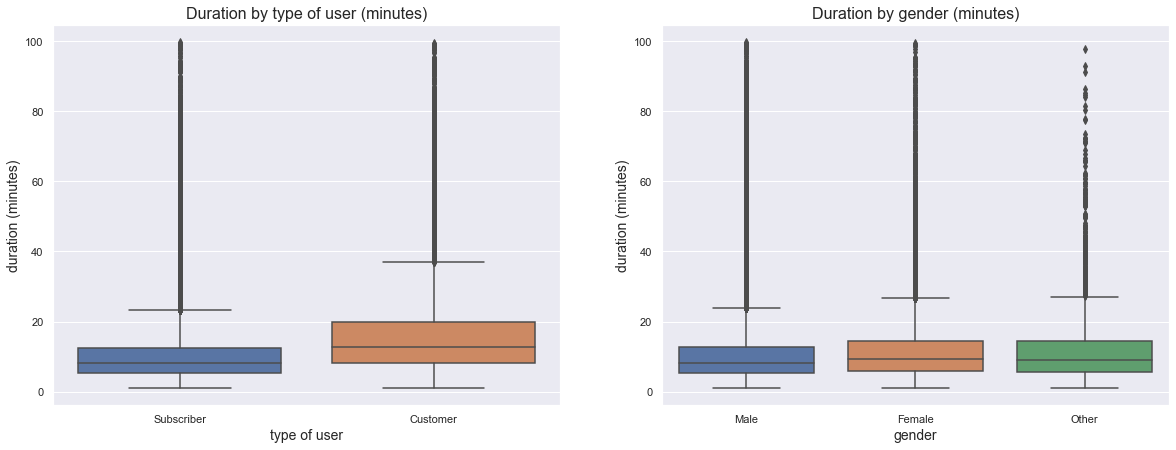

In [64]:
plt.figure(figsize = [20, 7]) 
sb.set_theme(style="darkgrid")

# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
# Box plot duration less or equal to 100
sb.boxplot(data=data.query('duration <= 100'), x='user_type', y='duration')
plt.ylabel('duration (minutes)', fontsize=14)
plt.xlabel('type of user', fontsize=14)
plt.title('Duration by type of user (minutes)', fontsize=16)
g.bar_label(g.containers[0])

#  Box plot duration less or equal to 100
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 
sb.boxplot(data=data.query('duration <= 100'), x='member_gender', y='duration')
plt.ylabel('duration (minutes)', fontsize=14)
plt.xlabel('gender', fontsize=14)
plt.title('Duration by gender (minutes)', fontsize=16)
g.bar_label(g.containers[0]);

**We see that the customer spends more time per trip on average than the subscriber. The difference in duration by gender is minimal. We can see a lot of the outlier too.**

### Lets make a Plot year of birth vs number of trips by user type
We are going to consider year of birth from 1970.

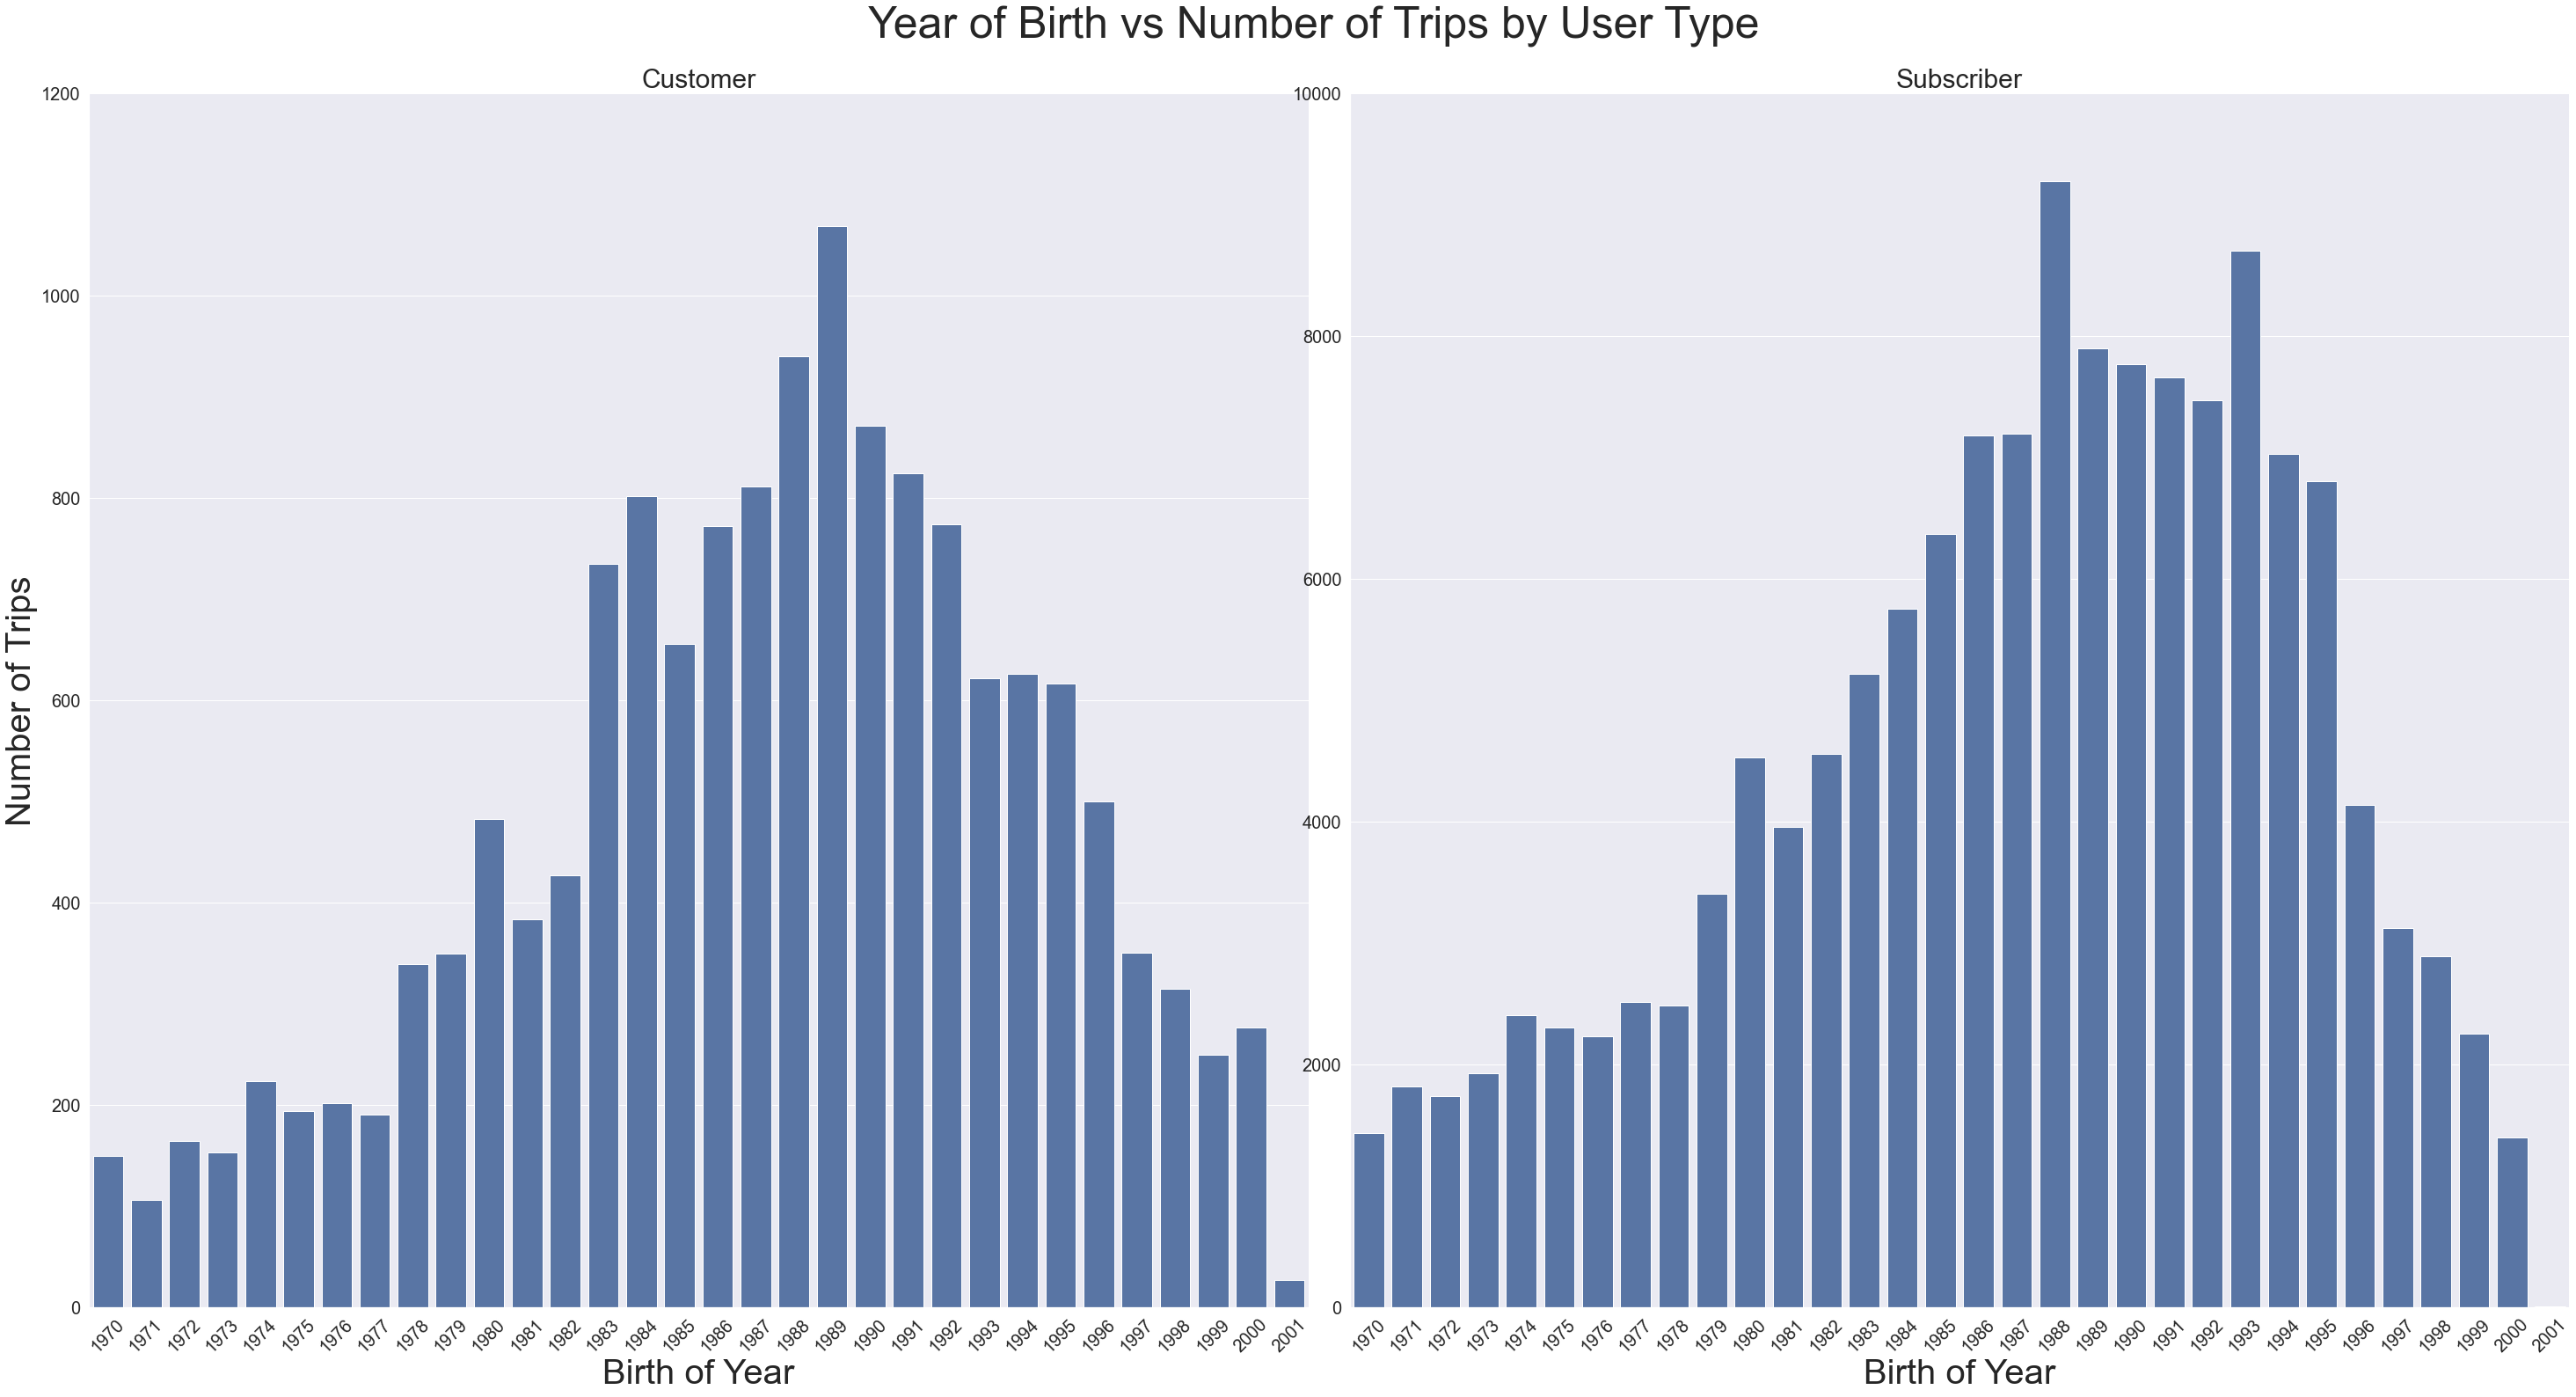

In [65]:

g =sb.catplot(data =data[data['member_birth_year'] >= 1970], x = 'member_birth_year',
           col = 'user_type', kind = 'count', height=20, aspect=1, palette=['#4c72b0'], sharey = False)

g.set_axis_labels("Birth of Year", "Number of Trips", fontsize =40)
g.set_xticklabels(rotation = 45, fontsize = 20)
g.set_yticklabels( fontsize = 20)
g.fig.suptitle('Year of Birth vs Number of Trips by User Type', fontsize =50, y=1.05);
g.set_titles('{col_name}', size = 30);

**We see that Suscriber has more trips with two peaks in 1988 and 1993. The peak in Customer are people were born in 1989.**

### Let's plot the total trips along the hours of the day by user type

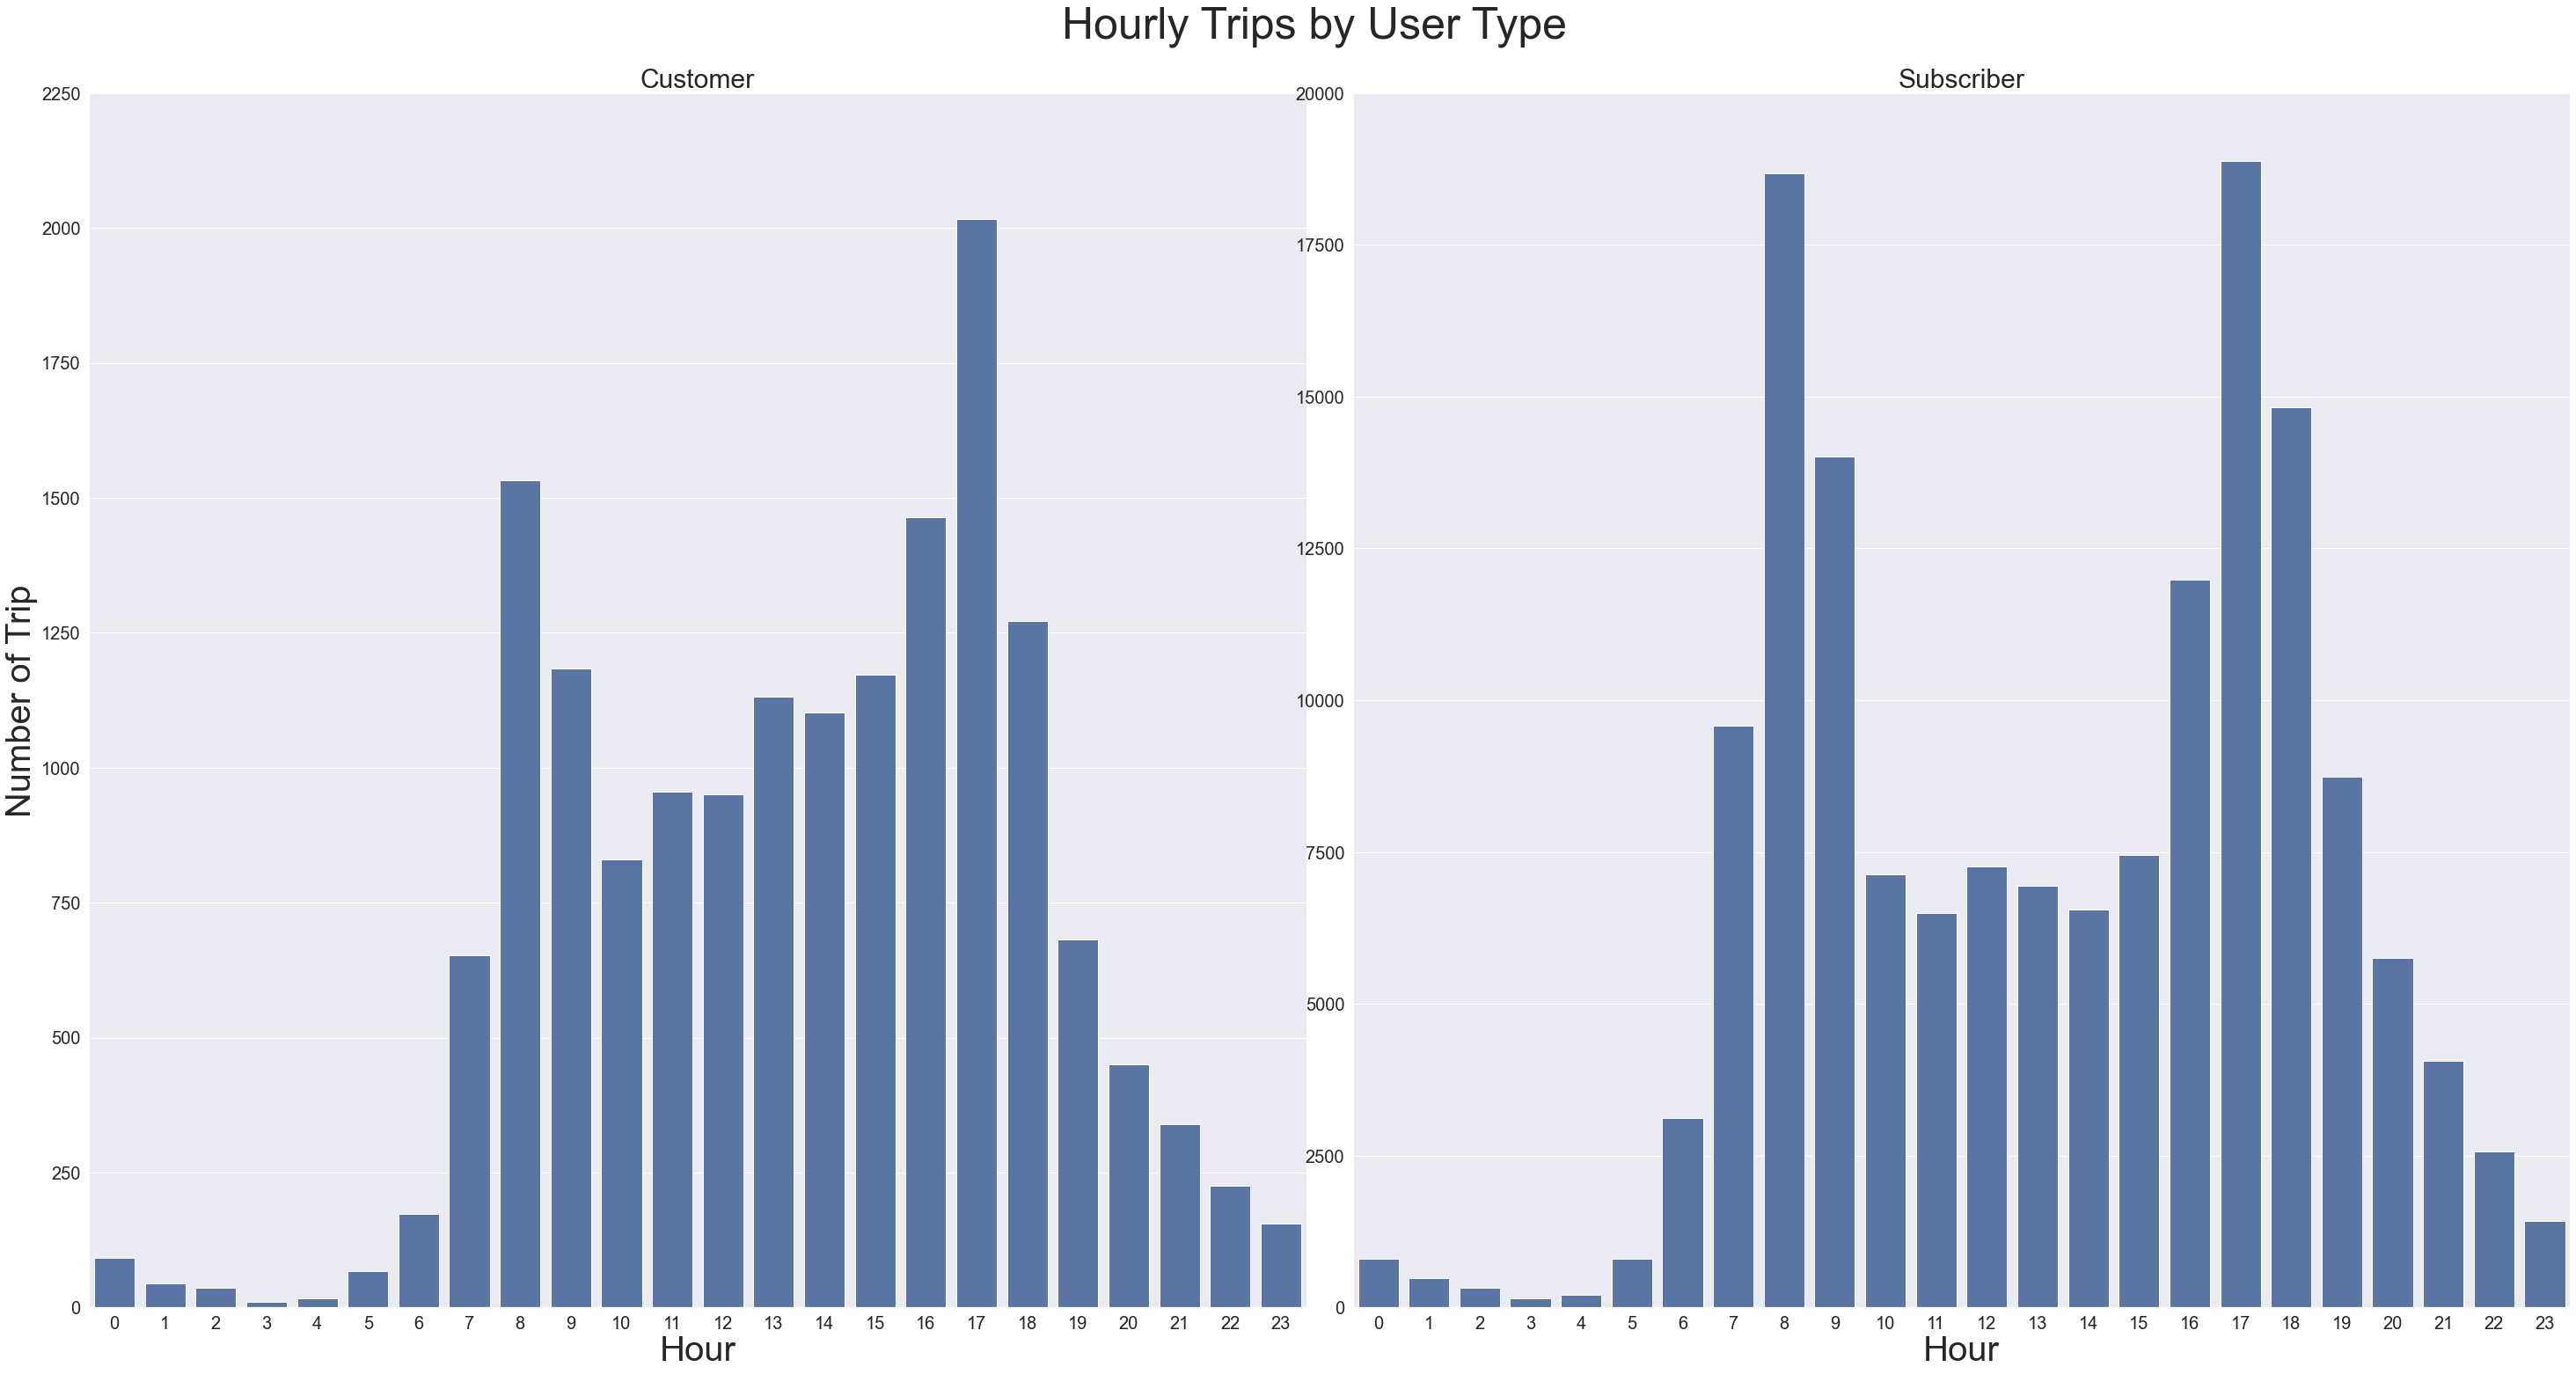

In [66]:
#sb.set_context("paper", rc={"font.size":100,"axes.titlesize":30,
#                            "axes.labelsize":40, 'xtick.labelsize':20, 'ytick.labelsize':20})
g =sb.catplot(data =data, x = 'start_hour',
           col = 'user_type', kind = 'count', height=20, aspect=1, palette=['#4c72b0'], sharey = False)

g.set_axis_labels("Hour", "Number of Trip", fontsize =40)
g.set_xticklabels(fontsize = 20)
g.set_yticklabels(fontsize = 20)
g.fig.suptitle('Hourly Trips by User Type', fontsize =50, y=1.05)
g.set_titles('{col_name}', size = 30);

**We see that the distribution of Suscriber is very similar with the plot of the total rides with the two group of user together by hour that we made in the univariate study with a flat range in the number of trips between 10 to 15 and two clear peaks that which coincides with working hours. In the case of Customer doesn't has the flat range in the number of trip.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When we look at the graphs dividing the data by type of user, we see that the mean in the box plot in the duration of the trip is greater in custumers than in Subscriber and the IQR is also greater, it seems that the subscribers use the service to go to work and maybe the custumer are tourists or people who use the service just for fun. There is a flat period of time in the total trips between 10 and 15 hours of the subscribers (non-working hours) with two clear peaks in the working day and the custumers do not have this pattern.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Sunday and Saturday have the highest average duration in minutes. We have seen that there were fewer trips on weekends than on weekdays. It seems that people spend more time on the weekends probably just for fun and sightseeing. In working hours, the average duration remains close to the general average duration for all trips (11.74 minutes). Between 2 and 3 in the morning the average increases from 17.78 to 24.93.

<a id='multivariate'></a>
## Multivariate Exploration

> We are going to create plots of three or more variables to investigate the relation among them.

### Let's get the mean duration by day and member gender

In [67]:
# Filter for duration less or equal to 100 minutes
data_gender = data.query('duration <= 100')
mean_duration_gender =data_gender.groupby(['start_day', 'member_gender']).agg({'duration': 'mean'}).sort_values(by = 'duration',
                                                                    ascending = False).reset_index()
mean_duration_gender

,start_day,member_gender,duration
0,Sunday,Other,14.762603
1,Saturday,Other,14.439665
2,Sunday,Female,13.684751
3,Saturday,Female,13.187391
4,Tuesday,Other,11.954256
5,Friday,Other,11.914675
6,Sunday,Male,11.730370
7,Saturday,Male,11.696296
8,Monday,Female,11.380211
9,Thursday,Other,11.377461


In [68]:
# Get the proportion of the genders
data.member_gender.value_counts()/data.member_gender.value_counts().sum()

Male      0.745870
Female    0.233277
Other     0.020853
Name: member_gender, dtype: float64

We see that the Males have more than triple the Females and the rest is only 2%.

### Let's make a plot to see the mean duration of the trips by day and gender

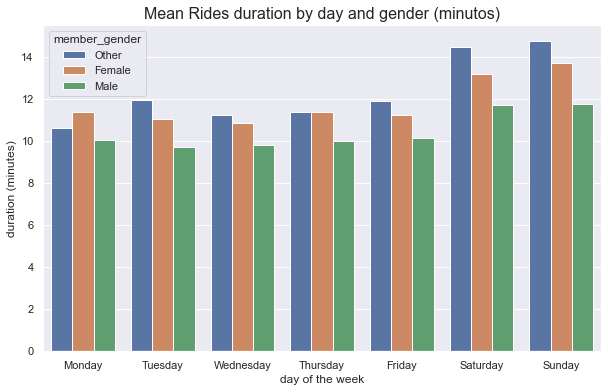

In [69]:
plt.figure(figsize = [10, 6]) 
weekday = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
sb.barplot(data = mean_duration_gender, x = 'start_day', y = 'duration',
          order=weekday, hue ='member_gender')
plt.ylabel('duration (minutes)')
plt.xlabel('day of the week')
plt.title('Mean Rides duration by day and gender (minutos)', fontsize=16);

**The mean duration of Femele is higher than Male in all the days of the week.**

In [70]:
# Filter data by duration less or equal to 100 minutes
data_user100 = data.query('duration <= 100')
mean_duration_user =data_user100.groupby(['start_day', 'user_type']).agg({'duration': 'mean'}).sort_values(by = 'duration',
                                                                    ascending = False).reset_index()
mean_duration_user

,start_day,user_type,duration
0,Sunday,Customer,20.386084
1,Saturday,Customer,19.789160
2,Monday,Customer,16.393475
3,Friday,Customer,15.247889
4,Thursday,Customer,14.641194
5,Tuesday,Customer,14.171872
6,Wednesday,Customer,13.993165
7,Sunday,Subscriber,10.798527
8,Saturday,Subscriber,10.785868
9,Thursday,Subscriber,9.948951


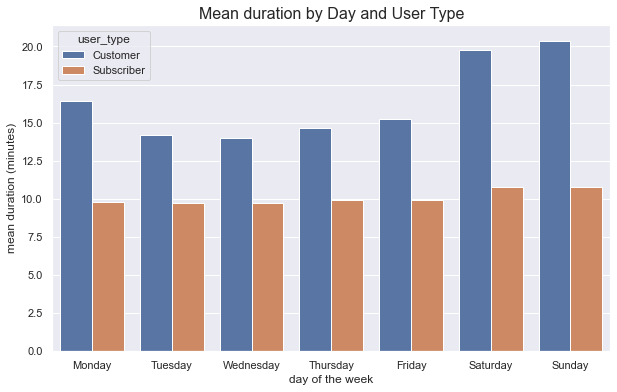

In [71]:
plt.figure(figsize = [10, 6]) 
weekday = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
sb.barplot(data = mean_duration_user, x = 'start_day', y = 'duration',
          order=weekday, hue ='user_type')
plt.ylabel('mean duration (minutes)')
plt.xlabel('day of the week')
plt.title('Mean duration by Day and User Type', fontsize=16);

**The average duration is longer every day of the week in the Customer Group, with a significant increase at the weekend. The group of subscribers the average duration remains practically the same every day with a small increase in the weekend.**

### Let's make a plot to see the total number of trips by day and gender
We are going to get the data

In [72]:
day_trips_gender =data.groupby(['start_day', 'member_gender']).agg({'bike_id': 'count'}).sort_values(by = 'bike_id',
                                                                    ascending = False).reset_index()
day_trips_gender

,start_day,member_gender,bike_id
0,Thursday,Male,24933
1,Tuesday,Male,22747
2,Wednesday,Male,21244
3,Friday,Male,20915
4,Monday,Male,19259
5,Saturday,Male,10647
6,Sunday,Male,10595
7,Thursday,Female,8028
8,Tuesday,Female,7249
9,Wednesday,Female,6552


### See a plot total number of trips by day and gender

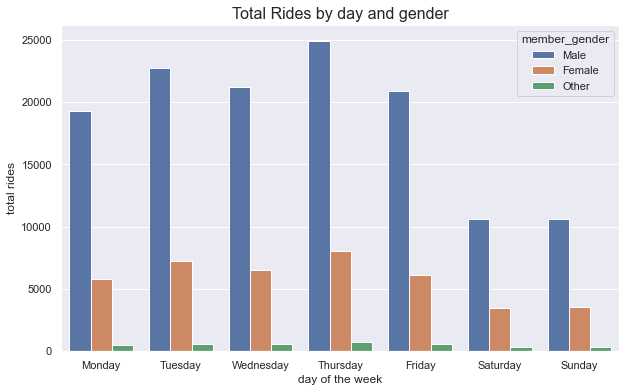

In [73]:
plt.figure(figsize = [10, 6]) 
weekday = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
sb.barplot(data = day_trips_gender, x = 'start_day', y = 'bike_id',
           order=weekday, hue ='member_gender')
plt.ylabel('total rides')
plt.xlabel('day of the week')
plt.title('Total Rides by day and gender', fontsize=16);

**There are many more men's trips than women's trips and few trips of other.**

### Let's make a plot year of birth vs duration by type of user.

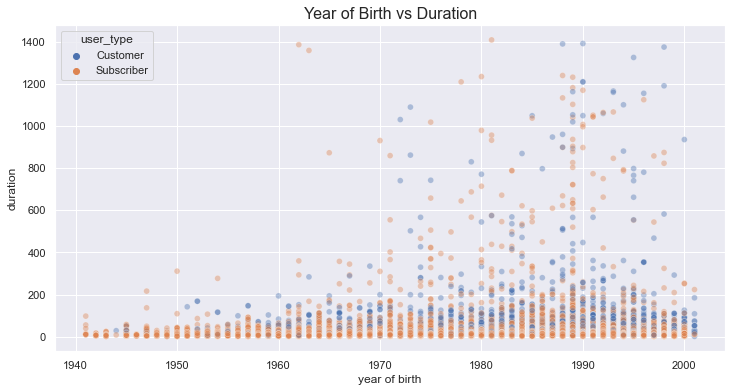

In [74]:
plt.figure(figsize = [12, 6]) 
sb.scatterplot(data = data, x ='member_birth_year', y = 'duration', alpha = 0.4, hue ='user_type')
plt.xlabel('year of birth')
plt.title('Year of Birth vs Duration', fontsize=16);

**We can see more suscribers than customer point.**

### The three busiest stations in total of rides by day of the week.

In [75]:
data_station = data.groupby(['start_station_name']).count().sort_values(by = 'bike_id', 
                                                                                     ascending =False ).reset_index()
list_station =(data_station.head(3)[['start_station_name']].to_numpy())
list_station = list(list_station.flatten())
list_station

['Market St at 10th St',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Berry St at 4th St']

In [76]:
data_top3 = data[data['start_station_name'].isin(list_station)]
data_top3

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,end_hour,end_day,end_month,duration
38,58,Market St at 10th St,37.776619,-122.417385,145,29th St at Church St,37.743684,-122.426806,5938,Subscriber,1992,Female,No,23,Thursday,February,23,Thursday,February,17.766667
54,58,Market St at 10th St,37.776619,-122.417385,62,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990,Female,No,23,Thursday,February,23,Thursday,February,6.683333
85,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80,Townsend St at 5th St,37.775235,-122.397437,5012,Subscriber,1995,Male,No,23,Thursday,February,23,Thursday,February,1.216667
89,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,9,Broadway at Battery St,37.798572,-122.400869,6581,Subscriber,1991,Female,No,22,Thursday,February,23,Thursday,February,30.050000
110,58,Market St at 10th St,37.776619,-122.417385,98,Valencia St at 16th St,37.765052,-122.421866,6435,Subscriber,1994,Male,No,23,Thursday,February,23,Thursday,February,6.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183362,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,-122.420975,2033,Subscriber,1999,Male,No,1,Friday,February,1,Friday,February,14.983333
183364,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,-122.420975,3392,Subscriber,2000,Male,No,1,Friday,February,1,Friday,February,14.866667
183365,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,-122.420975,4962,Subscriber,2000,Female,No,1,Friday,February,1,Friday,February,15.533333
183366,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,-122.420975,5382,Subscriber,2000,Female,No,1,Friday,February,1,Friday,February,15.533333


In [77]:
data_top3 = data_top3.groupby(['start_station_name', 'start_day']).count().reset_index()
data_top3

,start_station_name,start_day,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_month,end_hour,end_day,end_month,duration
0,Berry St at 4th St,Friday,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510
1,Berry St at 4th St,Monday,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459
2,Berry St at 4th St,Saturday,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
3,Berry St at 4th St,Sunday,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
4,Berry St at 4th St,Thursday,626,626,626,626,626,626,626,626,626,626,626,626,626,626,626,626,626,626
5,Berry St at 4th St,Tuesday,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568
6,Berry St at 4th St,Wednesday,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517
7,Market St at 10th St,Friday,657,657,657,657,657,657,657,657,657,657,657,657,657,657,657,657,657,657
8,Market St at 10th St,Monday,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
9,Market St at 10th St,Saturday,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285


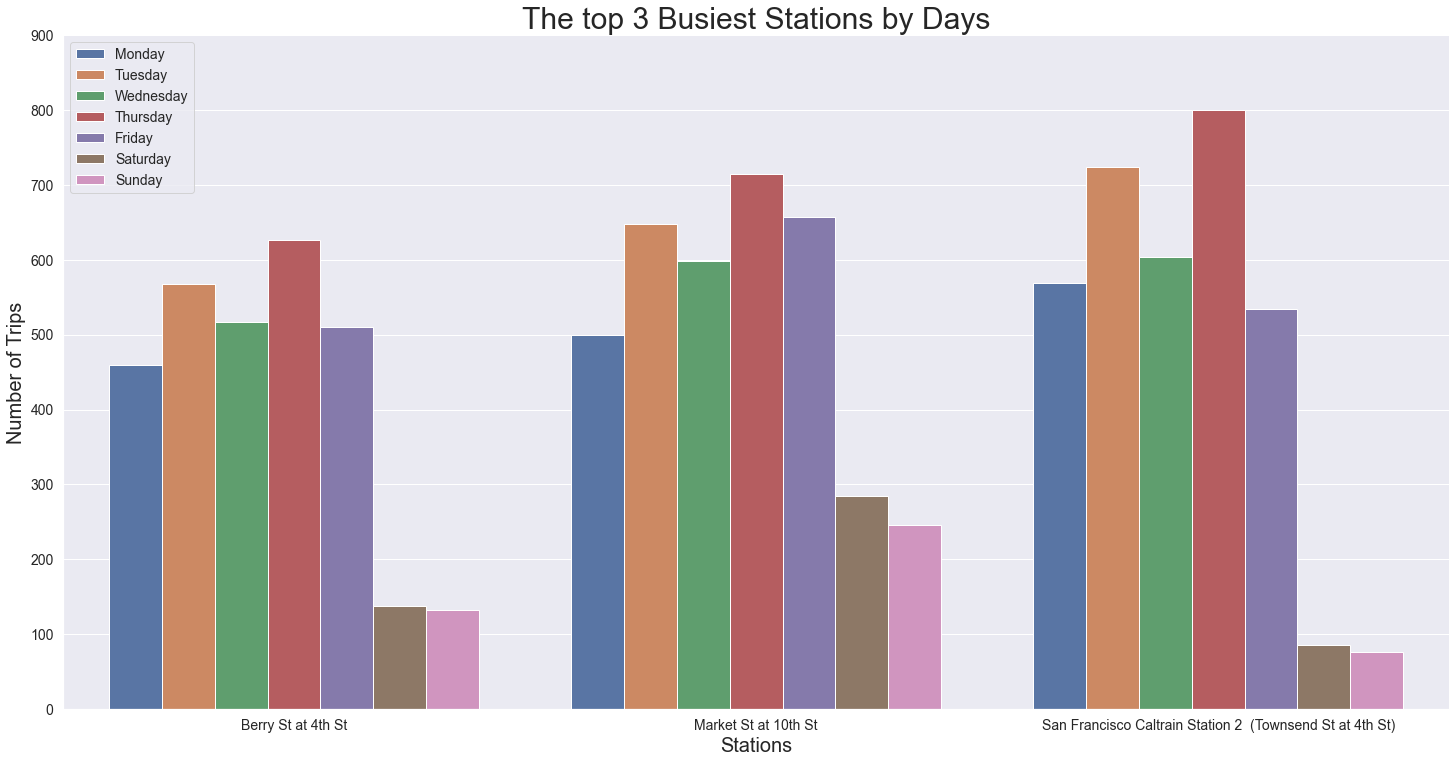

In [78]:
order = ['Monday','Tuesday','Wednesday','Thursday', 
         'Friday' ,'Saturday','Sunday' ]

g =sb.catplot(data = data_top3, x = 'start_station_name', y = 'bike_id', hue ='start_day', 
           kind = 'bar', hue_order=order, legend = False, height=10, aspect=2)
plt.ylabel('Number of Trips', fontsize=20)
plt.xlabel('Stations', fontsize=20)
g.set_xticklabels(fontsize = 14)
g.set_yticklabels(fontsize = 14)
plt.legend(title='', loc='upper left', fontsize = 14)
plt.title('The top 3 Busiest Stations by Days', fontsize=30);

**We can say that San Francisco Caltrain Station 2 is the busiest station from Monday to Thursday, but on Fridays Market St at 10th St stations is busiest and on weekends too. The first place of Market St at 10th St in total amout of rides shwon in the previuos plot it can be explain because the increse of the bike rides in weekend.**

### Let's get the data of the average duration, day of the week and user type

In [79]:
# We are going to consider duration less or equal to ome hundrde minutes
data_user_mean_duration = data_user100.groupby(['start_day', 'user_type']).agg({'duration': 'mean'}).reset_index()

data_user_mean_duration['day_number'] = data_user_mean_duration.start_day.apply(lambda x: time.strptime(x, "%A").tm_wday)
data_user_mean_duration = data_user_mean_duration.sort_values(by = 'day_number')
data_user_mean_duration

,start_day,user_type,duration,day_number
2,Monday,Customer,16.393475,0
3,Monday,Subscriber,9.780782,0
10,Tuesday,Customer,14.171872,1
11,Tuesday,Subscriber,9.742786,1
12,Wednesday,Customer,13.993165,2
13,Wednesday,Subscriber,9.756876,2
8,Thursday,Customer,14.641194,3
9,Thursday,Subscriber,9.948951,3
0,Friday,Customer,15.247889,4
1,Friday,Subscriber,9.920714,4


### Make a plot average duration vs day of the week by user type

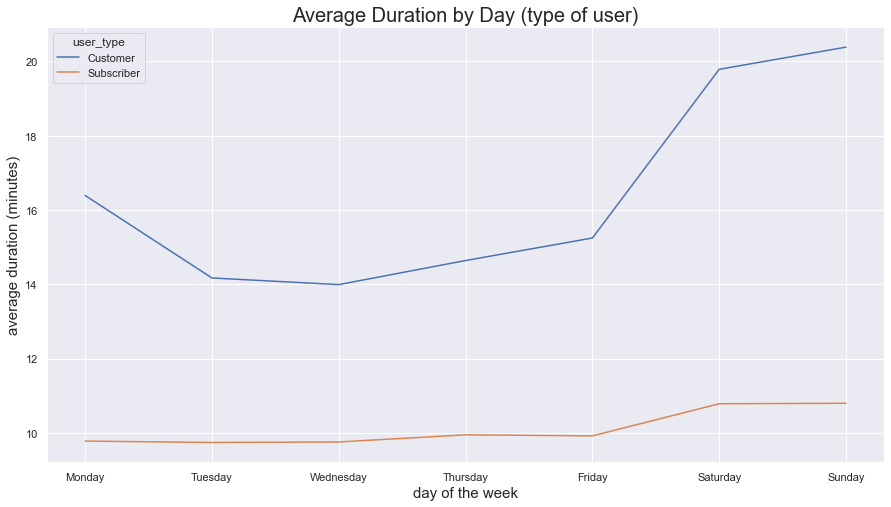

In [80]:
import matplotlib.dates as mdates
plt.figure(figsize = [15, 8]) 
chart = sb.lineplot(data=data_user_mean_duration, x="start_day", y="duration",
                   hue = 'user_type')
plt.xlabel('day of the week',  fontsize=15)
plt.ylabel('average duration (minutes)', fontsize=15)
plt.title('Average Duration by Day (type of user)', fontsize=20);

**Firstly, the two groups show an increase in the average duration of the trips during the weekend. The customer group has a much higher average in the duration of the travel than the subscriber group. This can be explained if we assume that subscribers usually use the bicycle to go to work and customers use it to enjoy themselves.**

### Let's make a heatmap plot to see number of trip in fuction of day of the week and hour of the day

In [81]:
# Get the data for Customer
data_customer = data[data['user_type'] == 'Customer'] 
data_customer = data_customer.groupby(['start_day', 'start_hour']).count().reset_index()[['start_day', 
                                                                                          'start_hour', 'bike_id' ]]
data_customer['day_number'] = data_customer.start_day.apply(lambda x: time.strptime(x, "%A").tm_wday)

# get the data for Subscribers
data_subscriber = data[data['user_type'] == 'Subscriber'] 
data_subscriber = data_subscriber.groupby(['start_day', 'start_hour']).count().reset_index()[['start_day', 
                                                                                          'start_hour', 'bike_id' ]]
data_subscriber['day_number'] = data_subscriber.start_day.apply(lambda x: time.strptime(x, "%A").tm_wday)


In [82]:
#Pivot the data
data_customer = data_customer.pivot( "start_day",'start_hour' ,"bike_id")
data_subscriber = data_subscriber.pivot("start_day", "start_hour", "bike_id")

In [83]:
data_subscriber = data_subscriber.reindex(order)
data_customer = data_customer.reindex(order)


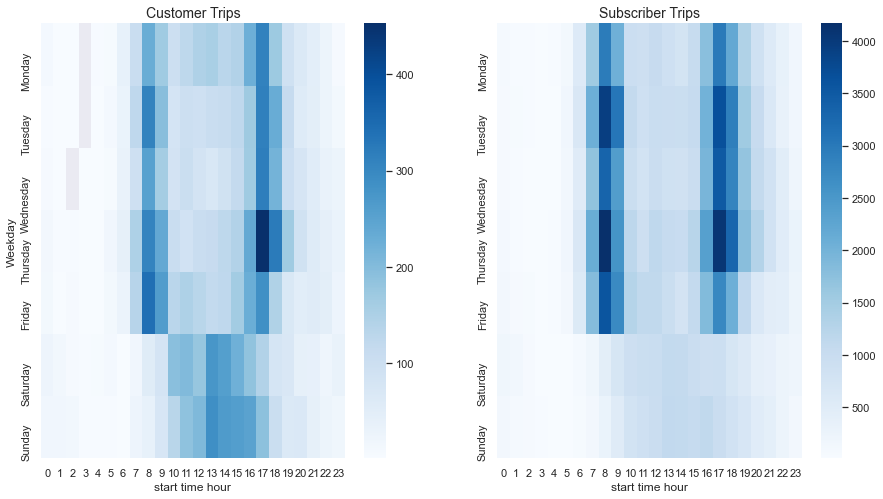

In [84]:
# Heatmap plot
plt.figure(figsize=(15,8)) # Heatmap plo

# Subplot
plt.subplot(1,2,1)
ax = sb.heatmap(data_customer, cmap='Blues')
plt.ylabel('Weekday')
plt.xlabel('start time hour')
plt.title("Customer Trips", size = 14);


plt.subplot(1,2,2)
ax = sb.heatmap(data_subscriber, cmap="Blues")
plt.ylabel('')
plt.xlabel('start time hour')
plt.title("Subscriber Trips", size = 14);

**We see that subscriber has more trips at 8:00 and at 17:00 from Monday to Friday and Saturday and Sunday decrese significantly the amount of rides at any time, on the contrary Customer has a lot of activite on weekend specialy between 10:00 to 17:00.**

### Let's get a heatmap with mean of the duration trips by weekdays and hours

In [85]:
# Get the data for Customer
duration_customer = data[data['user_type'] == 'Customer'] 
duration_customer = duration_customer.groupby(['start_day', 
                                               'start_hour']).agg({'duration': 'mean'}).reset_index()
duration_subscriber = data[data['user_type'] == 'Subscriber'] 
duration_subscriber = duration_subscriber.groupby(['start_day', 
                                               'start_hour']).agg({'duration': 'mean'}).reset_index()

In [86]:
#Pivot the data
data_customer = duration_customer.pivot("start_day", "start_hour", "duration")
data_subscriber = duration_subscriber.pivot("start_day", "start_hour", "duration")
data_subscriber = data_subscriber.reindex(order)
data_customer = data_customer.reindex(order)

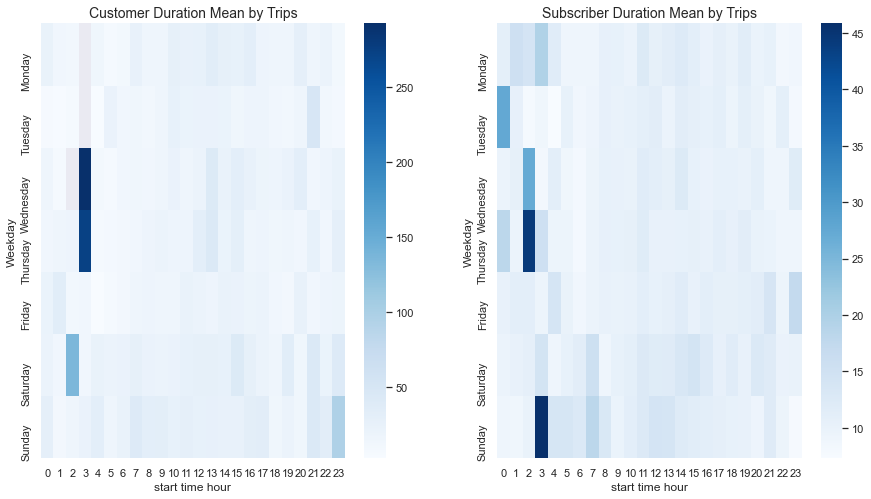

In [87]:
# Heatmap plot
plt.figure(figsize=(15,8)) # Heatmap plo

# Subplot
for i in range(1,3):
    plt.subplot(1,2,i)
    if i == 1:
        data_heat =data_customer
        user = 'Customer'
    else:
        data_heat = data_subscriber
        user = 'Subscriber'
    #print(user)
    ax = sb.heatmap(data_heat, cmap='Blues')
    plt.ylabel('Weekday')
    plt.xlabel('start time hour')
    plt.title(user + " " + "Duration Mean by Trips", size = 14);

**We observe that in the Subscriber group from 6 to 23 the duration mean still under 15 minutes from monday to friday and saturday and sunday with high mean between 2:00 to 4:00 , meanwhile in the Customer group the duration mean is higher.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between the average duration of trips and the type of user and how they are increases in customers, especially on weekends, remaining more or less constant in subscribers. The sharp increase in the number of trips in working hours in the group of subscribers. And since the amount of total trips has a peak around 1988 in the two user groups.

### Were there any interesting or surprising interactions between features?

> Well, there are some people who use the service so late at night.

<a id='conclusion'></a>
## Conclusions
* Most of the users are male (75%) and subscribers represent  91% of the total users.

* Thursday is the day of the week with the most total trips and 17:00 hours (5:00 p.m.) has the most total trips as well.

* The mean of the year of the birth of the total users is 1984.

* The duration mean of the duration of all trips is 11.74 minutes.

* In the group of subscribers the average duration remains practically the same every day with a small increase in the weekend. The group of customers the mean ih higher and increase on weekends in general spend more time. This can be explained if we assume that subscribers usually use the bicycle to go to work and customers use it to enjoy themselves and tourist. 

* The mean duration of the trips in Femele is higher than Male in all the days of the week.   
        
* San Francisco Caltrain Station 2 is the busiest station from Monday to Thursday, but on Fridays Market St at 10th St stations is busiest and on weekends too. The first place of Market St at 10th St in total amout of rides it can be explain because the increse of the bike rides in weekend.  

* From the heatmap, the subscriber has more trips at 8:00 a.m. and 5:00 p.m. from Monday to Friday and Saturday and Sunday the number of trips at any time decreases significantly, on the contrary, the client has a lot of activity on weekends, especially between 10:00 a.m. to 5:00 p.m..
